<a href="https://colab.research.google.com/github/syuan0525/project-team/blob/main/oilprice2line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
'''
掛載Google硬碟
安裝套件
引用套件
APP應用準備
消息素材準備
handler執行方法設計
啟動應用


'''

'\n掛載Google硬碟\n安裝套件\n引用套件\nAPP應用準備\n消息素材準備\nhandler執行方法設計\n啟動應用\n\n\n'

In [33]:
'''

資料 mapping 至google drive

把資料寫在/content/drive

即可保存在 google drive內

'''
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
'''

流程解析

'''


'\n\n流程解析\n\n'

In [35]:
!pip install line-bot-sdk flask flask-ngrok

In [36]:
'''
引用套件
'''


# 引用Web Server套件
from flask import Flask, request, abort, jsonify

# 載入json處理套件
import json

# 外部連結自動生成套件
from flask_ngrok import run_with_ngrok

# 從linebot 套件包裡引用 LineBotApi 與 WebhookHandler 類別
from linebot import (
    LineBotApi, WebhookHandler
)

# 引用無效簽章錯誤
from linebot.exceptions import (
    InvalidSignatureError
)


In [37]:
'''
建置主程序app

建置handler與 line_bot_api
'''
import os

if not os.path.isdir("/content/material"):
    os.mkdir("./material")
# 設定Server啟用細節
app = Flask(__name__,static_url_path = "/material" , static_folder = "./material/")
run_with_ngrok(app)

# 生成實體物件
line_bot_api = LineBotApi("fe9W+98abzzGHvjleSYFDLWQYEVgSPeDzwiitTXPNcDZa+oSBnokKSsZ99yDT7HXmlIK64GWNmzGpwTULv79BAPxxttdItA/5UkXsqe0ud53cmzXCpoumhzER+fLdWPKfZUq7deFCj9XwVXiAmrvcwdB04t89/1O/w1cDnyilFU=")
handler = WebhookHandler("a95c52182fdf038d8b325a54b939e824")

In [38]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import prettytable

--2021-11-07 15:03:19--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.125.138, 142.250.125.100, 142.250.125.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1kiua4vo3ip0l9p23lftcdhsr3ooiids/1636297350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-11-07 15:03:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1kiua4vo3ip0l9p23lftcdhsr3ooiids/1636297350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.191.132, 2607:f8b0:4001:c0c::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|64

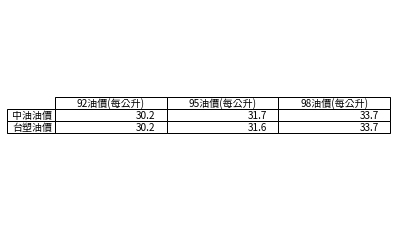

In [39]:
url = "https://gas.goodlife.tw/"
req = Request(url,headers={
    "user-agent" : "Mozilla/5.0"
  })
response = urlopen(req)
html = BeautifulSoup(response)

for i in html.find_all("div",id="cpc"):
  s1 = i.find_all("li")[0].find("h3")
  s1.extract()
  s2 = i.find_all("li")[1].find("h3")
  s2.extract()
  s3 = i.find_all("li")[2].find("h3")
  s3.extract()

df = pd.DataFrame(columns=["公司","92油價(每公升)","95油價(每公升)","98油價(每公升)"])

for i in html.find_all("div",id="cpc"):
  company = i.find("h2").text.replace("今日", "")
  price92 = i.find_all("li")[0].text.replace("\n", "")
  price95 = i.find_all("li")[1].text.replace("\n", "")
  price98 = i.find_all("li")[2].text.replace("\n", "")
  s = pd.Series([company,price92,price95,price98],index=["公司","92油價(每公升)","95油價(每公升)","98油價(每公升)"])
  df = df.append(s,ignore_index=True)

df.set_index("公司",inplace=True)

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
plt.figure(figsize=(6,4))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df, loc="center",)  # where df is your data frame

plt.savefig('./material/mytable.png')

In [40]:
!pip install pyimgur

In [41]:
import pyimgur

CLIENT_ID = "f39377e6676d4f0"
PATH = "./material/mytable.png" #A Filepath to an image on your computer"
title = "asdsada"
im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title=title)
#把圖片url設為全域變數不然handler內無法取到值
global url
url = uploaded_image.link

In [42]:
'''
建置主程序的API入口
  接受Line傳過來的消息
  並取出消息內容
  將消息內容存在google drive的檔案內
  並請handler 進行消息驗證與轉發
'''

# 啟動server對外接口，使Line能丟消息進來
@app.route("/", methods=['POST'])
def callback():
    # get X-Line-Signature header value
    signature = request.headers['X-Line-Signature']

    # get request body as text
    body = request.get_data(as_text=True)
    
    # 記錄用戶log
    f = open("/content/drive/MyDrive/ai-event.log", "a")
    f.write(body)
    f.close()

    # handle webhook body
    try:
        handler.handle(body, signature)
        
    except InvalidSignatureError:
        abort(400)

    return 'OK'

In [43]:
'''

消息素材準備

'''

# 將消息模型，文字收取消息與文字寄發消息 引入
from linebot.models import (
    MessageEvent, TextMessage, TextSendMessage, ImageSendMessage
)

specific_text_message=TextSendMessage("官方建議，用戶以文字消息觸發特殊功能的時候，要加上特殊符號")

# analyze_truth_image_message=ImageSendMessage(
#       original_content_url='https://i.imgur.com/M8jnn9B.png',
#       preview_image_url='https://i.imgur.com/LtCtgg0.jpg'
#       )
analyze_truth_image_message=ImageSendMessage(
  original_content_url=url,
  preview_image_url=url
  )


In [44]:
'''

設計一個字典
    當用戶輸入相應文字消息時，系統會從此挑揀消息

'''

# 根據自定義菜單四張故事線的圖，設定相對應image
template_message_dict = {
  "@123":specific_text_message,
  "@分析的本質": analyze_truth_image_message
}

In [45]:
# 用戶發出文字消息時， 按條件內容, 回傳文字消息
@handler.add(MessageEvent, message=TextMessage)
def handle_message(event, request):
    # if(event.message.text.find('@')!= -1):
    #     line_bot_api.reply_message(
    #     event.reply_token,
    #     template_message_dict.get(event.message.text)
    #     )
    # else:
    #     line_bot_api.reply_message(
    #     event.reply_token,
    #     TextSendMessage(text="字典內查無此字，請輸入@123或@分析的本質"))
        line_bot_api.reply_message(
        event.reply_token,
        template_message_dict.get("@分析的本質"))

In [46]:
# 主程序運行
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://49a9-35-225-247-109.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Nov/2021 15:03:53] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2021 15:04:27] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2021 15:05:14] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2021 15:05:23] "POST / HTTP/1.1" 200 -
